In [2]:
# Load the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

data = pd.read_excel("/content/Online retail.xlsx", header=None)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,0


In [5]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
count,7501
unique,5176
top,cookies
freq,223


In [6]:
data.columns = ['Transactions']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Split the transactions into a list of items
data['Transactions'] = data['Transactions'].apply(lambda x: x.split(','))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Convert transactions into the required format
te = TransactionEncoder()
te_ary = te.fit(data['Transactions']).transform(data['Transactions'])
df = pd.DataFrame(te_ary, columns=te.columns_)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, ground beef, milk)"
253,0.017064,"(mineral water, spaghetti, ground beef)"
254,0.015731,"(mineral water, spaghetti, milk)"
255,0.010265,"(mineral water, spaghetti, olive oil)"


In [10]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules.head())

       antecedents      consequents  antecedent support  consequent support  \
0  (mineral water)        (avocado)            0.238368            0.033329   
1        (avocado)  (mineral water)            0.033329            0.238368   
2        (burgers)           (cake)            0.087188            0.081056   
3           (cake)        (burgers)            0.081056            0.087188   
4      (chocolate)        (burgers)            0.163845            0.087188   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.011598    0.048658  1.459926  0.003654    1.016113       0.413630  
1  0.011598    0.348000  1.459926  0.003654    1.168147       0.325896  
2  0.011465    0.131498  1.622319  0.004398    1.058080       0.420238  
3  0.011465    0.141447  1.622319  0.004398    1.063198       0.417434  
4  0.017064    0.104150  1.194537  0.002779    1.018933       0.194767  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


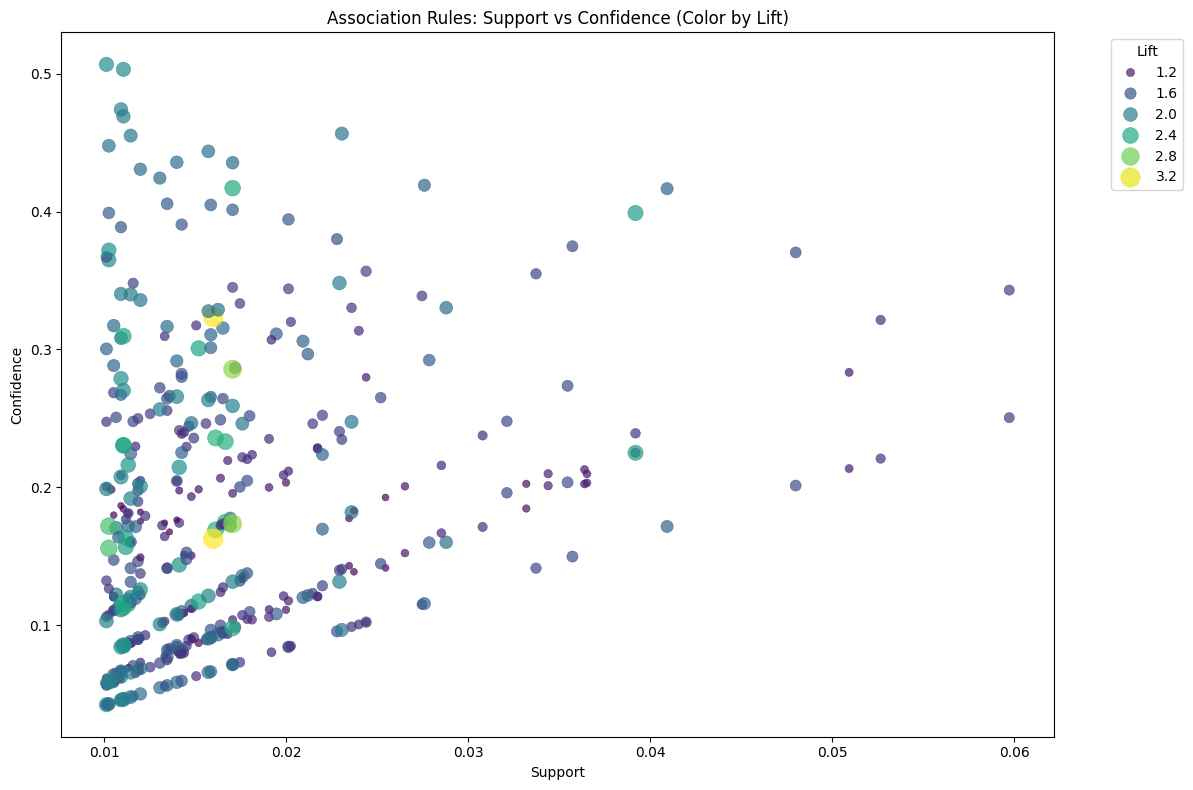

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
data = rules[['support', 'confidence', 'lift']]
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=data,
    x='support',
    y='confidence',
    hue='lift',
    palette='viridis',
    size='lift',
    sizes=(20, 200),
    alpha=0.7,
    edgecolor=None
)

plt.title('Association Rules: Support vs Confidence (Color by Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [13]:
# Display the rules
print("Top 5 rules based on lift:")
print(rules.nlargest(5, 'lift'))

# Sort the rules by confidence and display the top 5
print("\nTop 5 rules based on confidence:")
print(rules.nlargest(5, 'confidence'))

# Sort the rules by support and display the top 5
print("\nTop 5 rules based on support:")
print(rules.nlargest(5, 'support'))

# Further analysis to interpret the results
# Identify frequent antecedents and consequents
frequent_antecedents = rules['antecedents'].value_counts().head()
frequent_consequents = rules['consequents'].value_counts().head()

print("\nMost frequent antecedents:")
print(frequent_antecedents)

print("\nMost frequent consequents:")
print(frequent_consequents)

# Example of interpreting a rule
example_rule = rules.iloc[0]
antecedents = list(example_rule['antecedents'])
consequents = list(example_rule['consequents'])
confidence = example_rule['confidence']
lift = example_rule['lift']

print(f"\nExample Rule Interpretation:\nIf a customer buys {antecedents}, they are likely to buy {consequents} as well.")
print(f"Confidence: {confidence}, Lift: {lift}")

Top 5 rules based on lift:
                    antecedents                 consequents  \
215             (herb & pepper)               (ground beef)   
214               (ground beef)             (herb & pepper)   
382  (mineral water, spaghetti)               (ground beef)   
387               (ground beef)  (mineral water, spaghetti)   
394  (mineral water, spaghetti)                 (olive oil)   

     antecedent support  consequent support   support  confidence      lift  \
215            0.049460            0.098254  0.015998    0.323450  3.291994   
214            0.098254            0.049460  0.015998    0.162822  3.291994   
382            0.059725            0.098254  0.017064    0.285714  2.907928   
387            0.098254            0.059725  0.017064    0.173677  2.907928   
394            0.059725            0.065858  0.010265    0.171875  2.609786   

     leverage  conviction  zhangs_metric  
215  0.011138    1.332860       0.732460  
214  0.011138    1.135410       0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Display the rules
print("Top 5 rules based on lift:")
print(rules.nlargest(5, 'lift'))

# Sort the rules by confidence and display the top 5
print("\nTop 5 rules based on confidence:")
print(rules.nlargest(5, 'confidence'))

# Sort the rules by support and display the top 5
print("\nTop 5 rules based on support:")
print(rules.nlargest(5, 'support'))

# Further analysis to interpret the results
# Identify frequent antecedents and consequents
frequent_antecedents = rules['antecedents'].value_counts().head()
frequent_consequents = rules['consequents'].value_counts().head()

print("\nMost frequent antecedents:")
print(frequent_antecedents)

print("\nMost frequent consequents:")
print(frequent_consequents)

# Example of interpreting a rule
example_rule = rules.iloc[0]
antecedents = list(example_rule['antecedents'])
consequents = list(example_rule['consequents'])
confidence = example_rule['confidence']
lift = example_rule['lift']

print(f"\nExample Rule Interpretation:\nIf a customer buys {antecedents}, they are likely to buy {consequents} as well.")
print(f"Confidence: {confidence}, Lift: {lift}")

Top 5 rules based on lift:
                    antecedents                 consequents  \
215             (herb & pepper)               (ground beef)   
214               (ground beef)             (herb & pepper)   
382  (mineral water, spaghetti)               (ground beef)   
387               (ground beef)  (mineral water, spaghetti)   
394  (mineral water, spaghetti)                 (olive oil)   

     antecedent support  consequent support   support  confidence      lift  \
215            0.049460            0.098254  0.015998    0.323450  3.291994   
214            0.098254            0.049460  0.015998    0.162822  3.291994   
382            0.059725            0.098254  0.017064    0.285714  2.907928   
387            0.098254            0.059725  0.017064    0.173677  2.907928   
394            0.059725            0.065858  0.010265    0.171875  2.609786   

     leverage  conviction  zhangs_metric  
215  0.011138    1.332860       0.732460  
214  0.011138    1.135410       0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Interview Questions:**

 1.	What is lift and why is it important in Association rules?
     
     In the context of association rules, lift is a metric that quantifies how much more likely two items are to be bought together compared to if they were bought independently. It measures the increase in the likelihood of occurrence of a rule’s consequent (the item on the right-hand side of the rule) given the antecedent (the item on the left-hand side of the rule).

     Importance of Lift in Association Rules:
      Evaluates Strength of Association,
      Filters Out Common Items,
      Improves Rule Quality,
      Supports Business Decisions,
      Enhances Model Interpretation.

2.	What is support and Confidence. How do you calculate them?

     Support and Confidence are two fundamental metrics used in association rule mining to evaluate the significance and reliability of association rules. Here’s a detailed explanation of both metrics and how they are calculated:

     Support:
     Support measures how frequently an itemset or rule appears in the dataset. It provides an indication of the prevalence of the itemset or rule within the entire dataset.

     Confidence:
     Confidence measures the likelihood that the consequent of the rule occurs given that the antecedent has occurred. It represents the conditional probability of the consequent given the antecedent.

3.	What are some limitations or challenges of Association rules mining?

     Association rule mining is a powerful technique for discovering interesting relationships between variables in large datasets. However, it has several limitations and challenges that can impact its effectiveness and applicability

     Scalability and Computational Complexity, Handling High-Dimensional Data,  Threshold Sensitivity,  Redundancy and Rule Overlap,  . Lack of Temporal and Sequential Information